1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step
Predicted Disease: Premature Ventricular Contraction


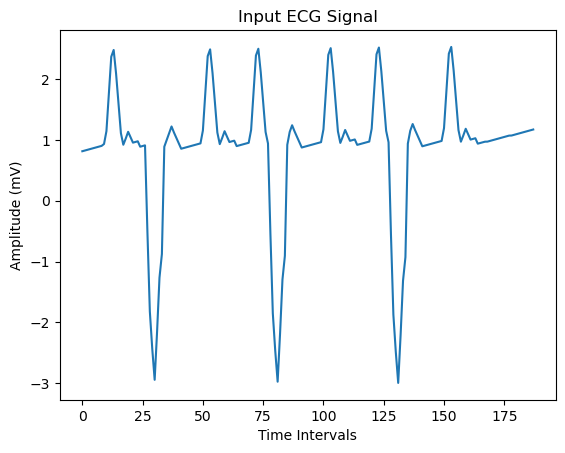

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import plotly.express as px
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, MaxPooling1D, Flatten, Dense, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix

# ... (rest of the code remains the same until the model definition)

# Load the trained model
model = tf.keras.models.load_model('D:/model_checkpoint.keras')

# Function to predict disease from ECG signal
def predict_disease(ecg_signal):
    # Reshape the ECG signal to match the model's input shape
    ecg_signal = ecg_signal.reshape(1, -1, 1)
    
    # Make predictions
    predictions = model.predict(ecg_signal)
    
    # Get the predicted class label
    predicted_class = np.argmax(predictions, axis=1)[0]
    
    # Map the predicted class label to disease name
    disease_map = {
        0: "Normal",
        1: "Atrial Premature",
        2: "Premature Ventricular Contraction",
        3: "Fusion of Ventricular and Normal",
        4: "Fusion of Paced and Normal"
    }
    
    predicted_disease = disease_map[predicted_class]
    
    return predicted_disease


ecg_pac_signal = np.array(
[0.8123456789012345, 0.8234567890123456, 0.8345678901234567, 0.8456789012345678, 0.8567890123456789, 0.8678901234567890, 0.8789012345678901, 0.8890123456789012, 0.9001234567890123, 0.9312345678901234, 1.1423456789012345, 1.7534567890123456, 2.3645678901234567, 2.4756789012345678, 2.0867890123456789, 1.5978901234567890, 1.1089012345678901, 0.9190123456789012, 1.0201234567890123, 1.1312345678901234, 1.0423456789012345, 0.9534567890123456, 0.9645678901234567, 0.9756789012345678, 0.8867890123456789, 0.8978901234567890, 0.9089012345678901, -0.5190123456789012, -1.8201234567890123, -2.4312345678901234, -2.9423456789012345, -2.1534567890123456, -1.2645678901234567, -0.8756789012345678, 0.8867890123456789, 0.9978901234567890, 1.1089012345678901, 1.2190123456789012, 1.1201234567890123, 1.0312345678901234, 0.9423456789012345, 0.8534567890123456, 0.8645678901234567, 0.8756789012345678, 0.8867890123456789, 0.8978901234567890, 0.9089012345678901, 0.9190123456789012, 0.9301234567890123, 0.9412345678901234, 1.1523456789012345, 1.7634567890123456, 2.3745678901234567, 2.4856789012345678, 2.0967890123456789, 1.6078901234567890, 1.1189012345678901, 0.9290123456789012, 1.0301234567890123, 1.1412345678901234, 1.0523456789012345, 0.9634567890123456, 0.9745678901234567, 0.9856789012345678, 0.8967890123456789, 0.9078901234567890, 0.9189012345678901, 0.9290123456789012, 0.9401234567890123, 0.9512345678901234, 1.1623456789012345, 1.7734567890123456, 2.3845678901234567, 2.4956789012345678, 2.1067890123456789, 1.6178901234567890, 1.1289012345678901, 0.9390123456789012, -0.5401234567890123, -1.8512345678901234, -2.4623456789012345, -2.9734567890123456, -2.1845678901234567, -1.2956789012345678, -0.9067890123456789, 0.9178901234567890, 1.1289012345678901, 1.2390123456789012, 1.1401234567890123, 1.0512345678901234, 0.9623456789012345, 0.8734567890123456, 0.8845678901234567, 0.8956789012345678, 0.9067890123456789, 0.9178901234567890, 0.9289012345678901, 0.9390123456789012, 0.9501234567890123, 0.9612345678901234, 1.1723456789012345, 1.7834567890123456, 2.3945678901234567, 2.5056789012345678, 2.1167890123456789, 1.6278901234567890, 1.1389012345678901, 0.9490123456789012, 1.0501234567890123, 1.1612345678901234, 1.0723456789012345, 0.9834567890123456, 0.9945678901234567, 1.0056789012345678, 0.9167890123456789, 0.9278901234567890, 0.9389012345678901, 0.9490123456789012, 0.9601234567890123, 0.9712345678901234, 1.1823456789012345, 1.7934567890123456, 2.4045678901234567, 2.5156789012345678, 2.1267890123456789, 1.6378901234567890, 1.1489012345678901, 0.9590123456789012, -0.5601234567890123, -1.8712345678901234, -2.4823456789012345, -2.9934567890123456, -2.2045678901234567, -1.3156789012345678, -0.9267890123456789, 0.9378901234567890, 1.1489012345678901, 1.2590123456789012, 1.1601234567890123, 1.0712345678901234, 0.9823456789012345, 0.8934567890123456, 0.9045678901234567, 0.9156789012345678, 0.9267890123456789, 0.9378901234567890, 0.9489012345678901, 0.9590123456789012, 0.9701234567890123, 0.9812345678901234, 1.1923456789012345, 1.8034567890123456, 2.4145678901234567, 2.5256789012345678, 2.1367890123456789, 1.6478901234567890, 1.1589012345678901, 0.9690123456789012, 1.0701234567890123, 1.1812345678901234, 1.0923456789012345, 1.0034567890123456, 1.0145678901234567, 1.0256789012345678, 0.9367890123456789, 0.9478901234567890, 0.9589012345678901, 0.9690123456789012, 0.9701234567890123, 0.9812345678901234, 0.9923456789012345, 1.0034567890123456, 1.0145678901234567, 1.0256789012345678, 1.0367890123456789, 1.0478901234567890, 1.0589012345678901, 1.0690123456789012, 1.0701234567890123, 1.0812345678901234, 1.0923456789012345, 1.1034567890123456, 1.1145678901234567, 1.1256789012345678, 1.1367890123456789, 1.1478901234567890, 1.1589012345678901, 1.1690123456789012])



predicted_disease = predict_disease(ecg_pac_signal)
print(f"Predicted Disease: {predicted_disease}")

# Optional: visualize the ECG signal
plt.plot(ecg_pac_signal)
plt.title("Input ECG Signal")
plt.xlabel("Time Intervals")
plt.ylabel("Amplitude (mV)")
plt.show()
